In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
train = pd.read_csv('/content/adult.data.csv',na_filter=' ?',na_values=' ?')
test = pd.read_csv('adult.test.csv',na_filter=' ?',na_values=' ?')

In [87]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [88]:
print(train.shape)
print(test.shape)

(32561, 15)
(16281, 15)


In [128]:
df = pd.concat([train,test])

In [129]:
df['cross_Valid'].unique()

array([nan, ' <=50K.', ' >50K.'], dtype=object)

In [130]:
df.skew()

age                0.557580
fnlwgt             1.438892
education_num     -0.316525
capital_gain      11.894659
capital_loss       4.569809
hours_per_week     0.238750
dtype: float64

In [131]:
df['capital_gain']=np.log(df['capital_gain']+1)
df['capital_loss']=np.log(df['capital_loss']+1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


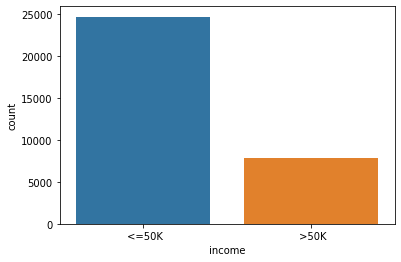

In [132]:
sns.countplot(df['income'],label="Count")


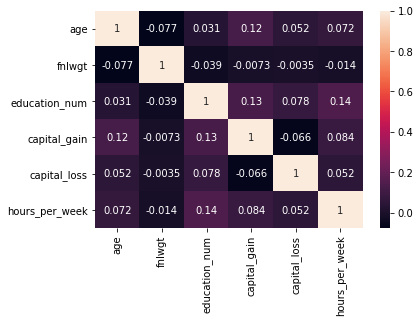

In [133]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


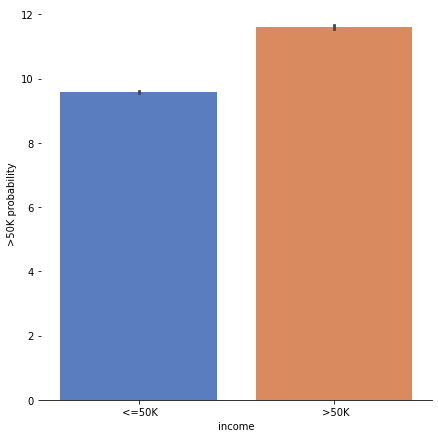

In [134]:
# Explore Education Num vs Income
g = sns.factorplot(y="education_num",x="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [135]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cross_Valid
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,<=50K,NaN


In [136]:
for i in df.columns:
  print(i,'=> ','no. of unique values ',df[i].nunique(),'|',' null values ',df[i].isna().sum())
  print(df[i].unique())
  print('--------------------------------------------------------------------------------------------------')

age =>  no. of unique values  74 |  null values  0
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
--------------------------------------------------------------------------------------------------
workclass =>  no. of unique values  8 |  null values  2799
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------------------------------------------------------
fnlwgt =>  no. of unique values  28523 |  null values  0
[ 77516  83311 215646 ... 173449  89686 350977]
--------------------------------------------------------------------------------------------------
education =>  no. of unique values  16 |  null values  0
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-ac

In [98]:
workclass=df.groupby(['workclass'])['income'].count().sort_values(0,ascending=False).rank(method='max').to_dict()
df['workclass']=df['workclass'].map(workclass)

In [99]:
occupation=df.groupby(['occupation'])['income'].count().sort_values(0,ascending=False).rank(method='max').to_dict()
df['occupation']=df['occupation'].map(occupation)

In [100]:
race=df.groupby(['race'])['income'].count().sort_values(0,ascending=False).rank(method='max').to_dict()
df['race']=df['race'].map(race)


relationship=df.groupby(['relationship'])['income'].count().sort_values(0,ascending=False).rank(method='max').to_dict()
df['relationship']=df['relationship'].map(relationship)

marital_status=df.groupby(['marital_status'])['income'].count().sort_values(0,ascending=False).rank(method='max').to_dict()
df['marital_status']=df['marital_status'].map(marital_status)

native_country=df.groupby(['native_country'])['income'].count().sort_values(0,ascending=False).rank(method='max').to_dict()
df['native_country']=df['native_country'].map(native_country)

In [101]:
df.fillna(0,inplace=True)

In [102]:
dummy_list=['sex','education']

In [103]:
dummy_drop = []
clean_df = df
for i in dummy_list:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = dummy_list)
df = df.drop(dummy_drop, axis = 1)

In [105]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income', 'cross_Valid',
       'sex_ Male', 'education_ 10th', 'education_ 11th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college'],
      dtype='object')

In [106]:
df['age_edu']=df['age']-df['education_num']

In [107]:
df.income.unique()
a = {' <=50K':0, ' >50K':1}

In [108]:
df['income']=df['income'].map(a)
cross= {' <=50K.':0, ' >50K.':1}
df['cross_Valid']=df['cross_Valid'].map(cross)

In [109]:
df.fillna(0,inplace=True)

In [110]:
train_len = len(train)
train_ = df[:train_len]
test_ = df[train_len:]

In [111]:
test_['cross_Valid'].value_counts()

0.0    12435
1.0     3846
Name: cross_Valid, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split,cross_val_score

y=train_['income']#.values.reshape(-1,1)
x=train_.drop(['income','cross_Valid'],axis=1)


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=34)

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
rfc = RandomForestClassifier(oob_score=True)
dtr = DecisionTreeClassifier()

def m_eval(model,X_train,y_train,X_test,y_test):
  for i in model:  
    i.fit(X_train,y_train)
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    print(i)
    print('Train f1_score',f1_score(y_train,pred_train))
    print('Test f1_score',f1_score(y_test,pred_test))
    print('Train accuracy',accuracy_score(y_train,pred_train))
    print('Test accuracy',accuracy_score(y_test,pred_test))
    print('*****************************************************')
    

In [122]:
m_eval([rfc,dtr,xgb],X_train,y_train,X_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
Train f1_score 0.99992875970649
Test f1_score 0.671484888304862
Train accuracy 0.999965874965875
Test accuracy 0.8464844949339884
*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1

In [123]:
pred = xgb.predict(test_.drop(['cross_Valid','income'],axis=1))

In [124]:
f1_score(test_['cross_Valid'].values,pred)

0.685924834193073

In [118]:
test_['cross_Valid'].value_counts()

0.0    12435
1.0     3846
Name: cross_Valid, dtype: int64